<a href="https://colab.research.google.com/github/sruthipsuresh/best-sellers-analysis/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
! pip install -U textblob
from textblob import TextBlob
from google.colab import files
import matplotlib.pyplot as plt
% matplotlib inline


Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [31]:
# Load 
nyt = pd.read_csv("/content/nytcleaned.csv") #loading data
nyt.head()
nyt['results__books__title'] = nyt['results__books__title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
nyt['results__books__title'] = nyt['results__books__title'].map(lambda x: x.lower())
nyt['results__books__description'] = nyt['results__books__description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
nyt['results__books__description'] = nyt['results__books__description'].map(lambda x: x.lower())
nyt.head()

,Unnamed: 0,results__books__description,results__books__title,results__books__author,results__books__amazon_product_url
0,0,an approach to dealing with trauma that shifts...,what happened to you,Bruce D. Perry and Oprah Winfrey,https://www.amazon.com/dp/1250223180?tag=NYTBS...
1,6,a look at the key players and outcomes of prec...,the bomber mafia,Malcolm Gladwell,https://www.amazon.com/dp/0316296619?tag=NYTBS...
2,12,an anthology of writing on the black experienc...,you are your best thing,edited Tarana Burke and Brené Brown,https://www.amazon.com/dp/0593243625?tag=NYTBS...
3,18,a collection of essays by the emmy-winning act...,how y'all doing,Leslie Jordan,https://www.amazon.com/dp/0063076195?tag=NYTBS...
4,24,how trauma affects the body and mind and innov...,the body keeps the score,Bessel van der Kolk,http://www.amazon.com/The-Body-Keeps-Score-Hea...


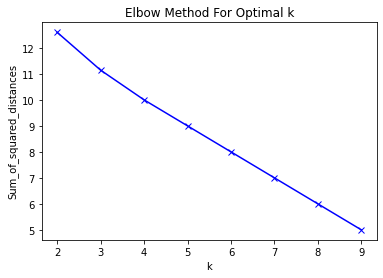

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
data = nyt.results__books__title.values.tolist() # Based on what is needed
X = vectorizer.fit_transform(data)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [33]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
from __future__ import print_function
km.fit(X)
clusters = km.labels_.tolist()
print(clusters)
clus = np.asarray(clusters)
# PRINT OUT CLUSTERS AND THE TOP TITLES
clus = np.asarray(clusters)
nyt['titlecluster'] = pd.Series(clus, index=titleclusters.index)


[1, 2, 1, 0, 2, 5, 0, 0, 0, 4, 0, 2, 0, 3, 5]


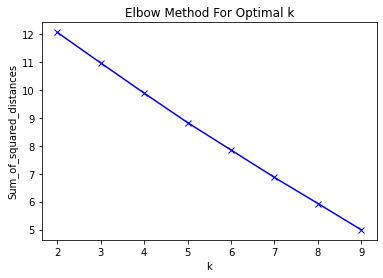

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
data = nyt.results__books__description.values.tolist() # Based on what is needed
X = vectorizer.fit_transform(data)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [37]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
from __future__ import print_function
km.fit(X)
clusters = km.labels_.tolist()
print(clusters)
clus = np.asarray(clusters)
# PRINT OUT CLUSTERS AND THE TOP TITLES
clus = np.asarray(clusters)
nyt['descriptioncluster'] = pd.Series(clus, index=nyt.index)
nyt.head()

nyt.to_csv('nytclustering.csv')



[4, 0, 4, 1, 3, 1, 5, 0, 2, 1, 2, 5, 4, 4, 3]
